In [128]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

In [129]:
df = pd.read_pickle('data/test_data.pkl')

In [130]:
df

,Values,Timestamps
0,105.0,2021-01-24 01:39:00+00:00
1,80.0,2021-01-24 01:40:00+00:00
2,93.0,2021-01-24 01:41:00+00:00
3,88.0,2021-01-24 01:42:00+00:00
4,74.0,2021-01-24 01:43:00+00:00
...,...,...
3594,178.0,2021-01-26 13:33:00+00:00
3595,206.0,2021-01-26 13:34:00+00:00
3596,225.0,2021-01-26 13:35:00+00:00
3597,186.0,2021-01-26 13:36:00+00:00


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Values      3599 non-null   float64
 1   Timestamps  3598 non-null   object 
dtypes: float64(1), object(1)
memory usage: 56.4+ KB


### Cleaning Data

In [132]:
df[df['Timestamps'].isna()==True]

,Values,Timestamps
2020,73.0,None


In [133]:
df.dropna(inplace=True)

In [134]:
df['Timestamps'].isna().sum()

0

In [135]:
df['Timestamps'] = pd.to_datetime(df['Timestamps'], utc=True, errors ='coerce')

In [136]:
df['Timestamps'].dt.year.unique()

array([2021.,   nan])

In [137]:
df[df['Timestamps'].dt.year!=2021]

,Values,Timestamps
857,131.0,NaT


In [138]:
df.drop(857, inplace=True)

In [139]:
df[df['Timestamps'].dt.year!=2021]

,Values,Timestamps


### Rango del periodo

In [140]:
df['Timestamps'].dt.year.unique()

array([2021], dtype=int64)

In [141]:
df['Timestamps'].dt.month.unique()

array([1], dtype=int64)

In [142]:
df['Timestamps'].dt.day.unique()

array([24, 25, 26], dtype=int64)

In [143]:
df['Timestamps'].dt.minute.nunique()

60

### Plotting

In [144]:
df.set_index('Timestamps', inplace=True)

In [145]:
df.head()

,Values
Timestamps,
2021-01-24 01:39:00+00:00,105.0
2021-01-24 01:40:00+00:00,80.0
2021-01-24 01:41:00+00:00,93.0
2021-01-24 01:42:00+00:00,88.0
2021-01-24 01:43:00+00:00,74.0


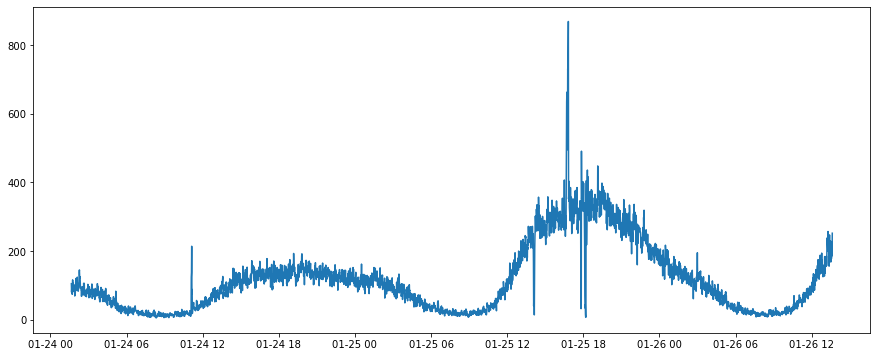

In [146]:
plt.figure(figsize=(15,6))
plt.plot(df.index, df['Values'])

In [147]:
df['day'] = df.index.day
df

,Values,day
Timestamps,,
2021-01-24 01:39:00+00:00,105.0,24
2021-01-24 01:40:00+00:00,80.0,24
2021-01-24 01:41:00+00:00,93.0,24
2021-01-24 01:42:00+00:00,88.0,24
2021-01-24 01:43:00+00:00,74.0,24
...,...,...
2021-01-26 13:33:00+00:00,178.0,26
2021-01-26 13:34:00+00:00,206.0,26
2021-01-26 13:35:00+00:00,225.0,26


In [149]:
start, end, day = 9, 12, 25

x = df[(df.index.hour >= start) & (df.index.hour < end) & (df.index.day == day)].index 
y = df[(df.index.hour >= start) & (df.index.hour < end) & (df.index.day == day)]['Values']

px.line(x=x, y=y)

----

----

----

In [152]:
print('STD: ', df[(df.index.hour >= 4) & (df.index.hour < 8) & (df.index.day == 24)]['Values'].std())
print('MEAN: ',df[(df.index.hour >= 4) & (df.index.hour < 8) & (df.index.day == 24)]['Values'].mean())
print('VAR: ',df[(df.index.hour >= 4) & (df.index.hour < 8) & (df.index.day == 24)]['Values'].var())

STD:  19.87305905717833
MEAN:  34.94583333333333
VAR:  394.93847629009764


In [200]:
import plotly.express as px

fig = px.line(df, x=df.index.values, y=df['Values'], title='3 dias plot', color=df['day'],  labels = {'x':'Hours', 'y':'Values'})
fig.show()

----

----

----

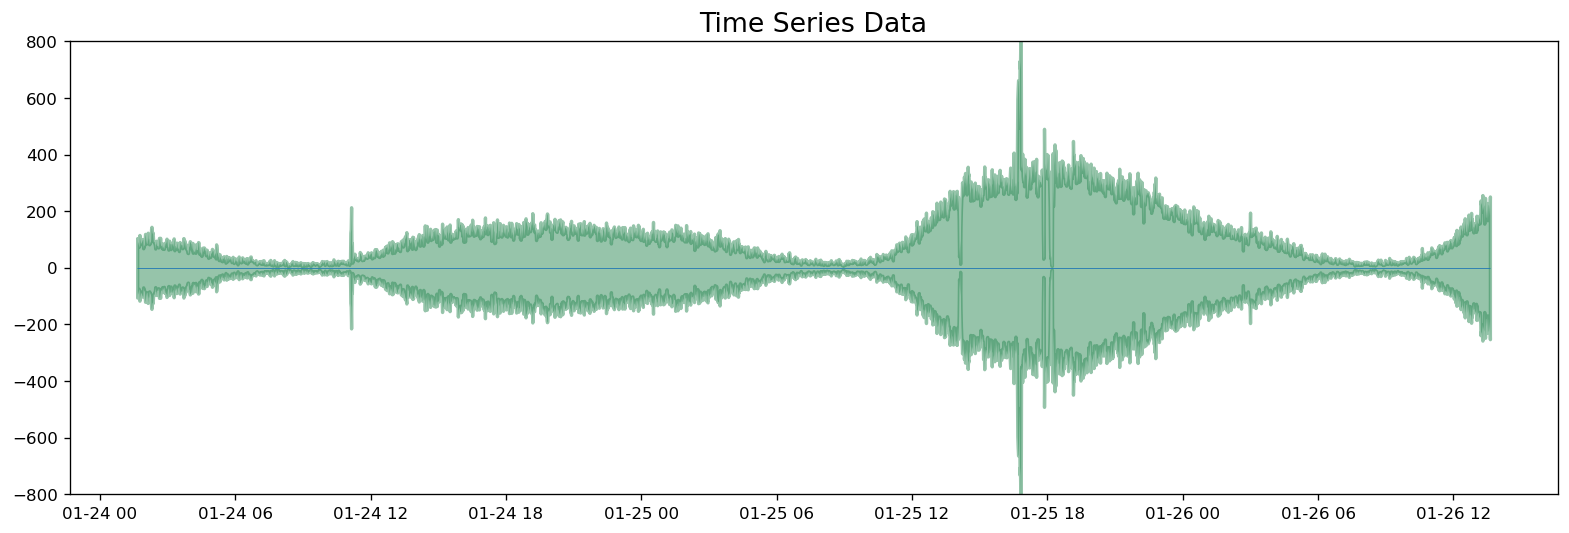

In [162]:
x = df.index.values
y1 = df.Values.values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Time Series Data', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

### Moving Average

In [172]:
fig = px.line(x=x, y=[y, y.rolling(window=10).mean(), y.rolling(window=30).mean()], labels = {'x':'Hours', 'y':'Values'})

def function_traces(trace):
    if trace.name == "wide_variable_0":
        trace.update(name="Normal")
    elif trace.name == 'wide_variable_1':
        trace.update(name='Moving Average 10')
    elif trace.name == 'wide_variable_2':
        trace.update(name='Moving Average 30')

fig.for_each_trace(function_traces)

#fig.for_each_trace(
#    lambda trace: trace.update(name="Normal") if trace.name == "wide_variable_0" else trace.update(name="Moving Average 10 days") ,
#)

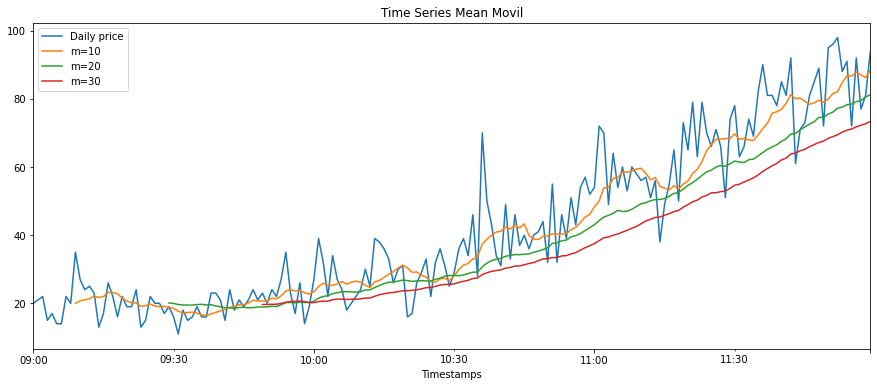

In [173]:
plt.figure(figsize=(15,6))

ax = y.plot(legend=False)

ax.set_title('Time Series Mean Movil')

y.rolling(window=10).mean().plot(ax=ax)
y.rolling(window=30).mean().plot(ax=ax)
y.rolling(window=50).mean().plot(ax=ax)
ax.legend(['Daily price', 'm=10', 'm=20', 'm=30'])

### Box plot

In [174]:
px.box(df, y='Values')

In [195]:
px.box(df, y='Values', color='day')

In [206]:
df['hour'] = df.index.hour

In [212]:
px.box(df[df.index.day == 26], y='Values', color='hour')

<Figure size 1080x432 with 0 Axes>

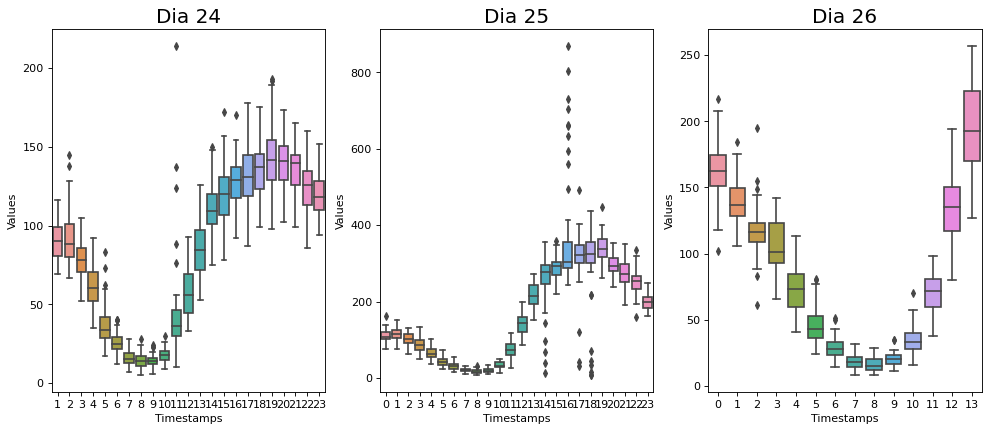

In [176]:
plt.figure(figsize=(15,6))

fig, axes = plt.subplots(1, 3, figsize=(15,6), dpi= 80)
sns.boxplot(ax=axes[0], x=df.loc[df.index.day==24].index.hour ,y=df.loc[df.index.day==24]['Values'])
sns.boxplot(ax=axes[1], x=df.loc[df.index.day==25].index.hour ,y=df.loc[df.index.day==25]['Values'])
sns.boxplot(ax=axes[2], x=df.loc[df.index.day==26].index.hour ,y=df.loc[df.index.day==26]['Values'])

axes[0].set_title('Dia 24', fontsize=18); 
axes[1].set_title('Dia 25', fontsize=18)
axes[2].set_title('Dia 26', fontsize=18)
plt.show()

----

----

---

---

## TESTS

### Testing for stationarity?

In [192]:
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(df['Values'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

print('------------------------')
# KPSS Test
result = kpss(df['Values'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.3106828864116815
p-value: 0.624270818417635
Critial Values:
   1%, -3.4321851131468084
Critial Values:
   5%, -2.8623508498242947
Critial Values:
   10%, -2.5672016286363797
------------------------

KPSS Statistic: 1.887685
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\iaan_\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning:

p-value is smaller than the indicated p-value



* Since the p value is larger than the significance level of 0.05, we cannot reject the null hypothesis that the time series data is non-stationary. 

* Thus, the time series data is non-stationary.
AR process with unit root is serially correlated. However, serially correlated time series data might not necessarily be AR process with unit root.

Text(0.5, 1.0, 'Time series detrended by subtracting the least squares fit')

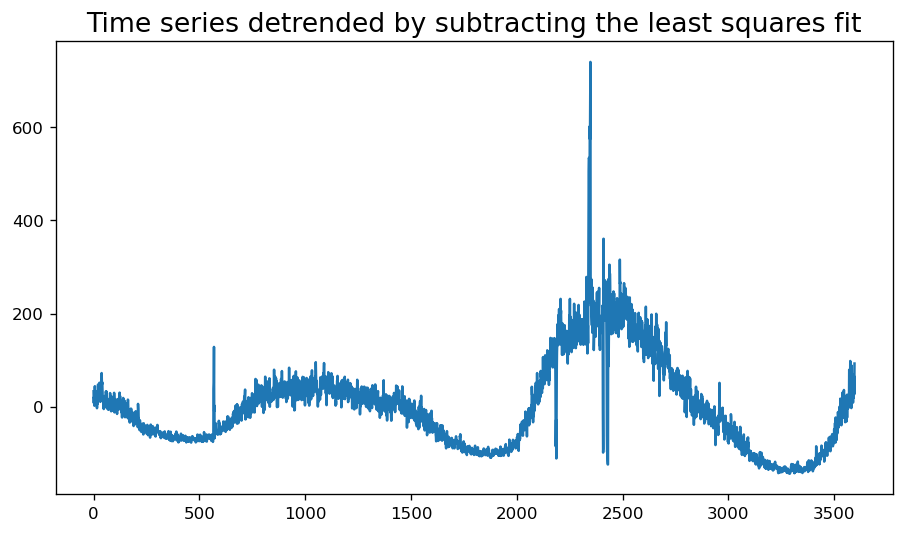

In [213]:
# Using scipy: Subtract the line of best fit
from scipy import signal

detrended = signal.detrend(df['Values'].values)
plt.plot(detrended)
plt.title('Time series detrended by subtracting the least squares fit', fontsize=16)

### Autocorrelation Function (ACF) plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

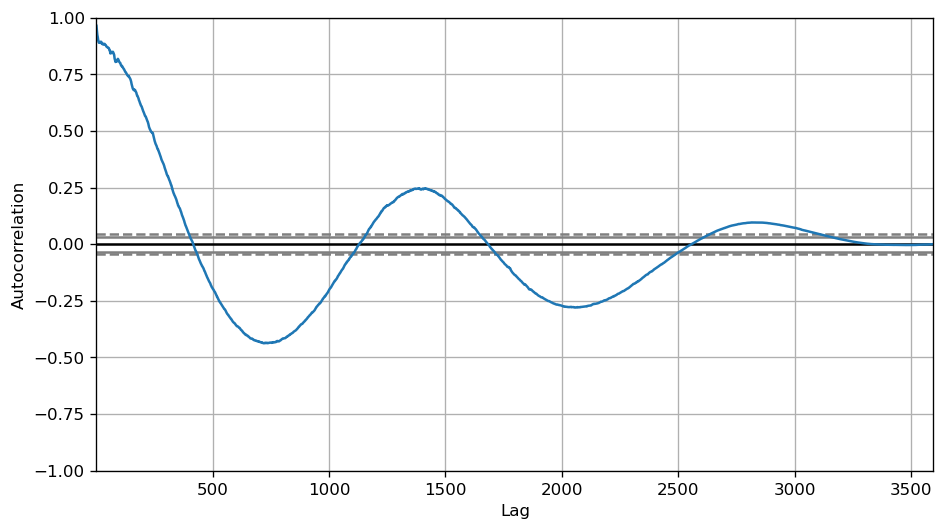

In [199]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['Values'].tolist())